Descriptive Analysis for GlucoGuard Analytics: Hospital Readmission Prediction of Diabetic Patients

How does the average hospital stay differ between patients who are readmitted within 30 days, after 30 days, and those who are not readmitted?

What are the average durations of hospital stays for patients readmitted within 30 days, readmitted after 30 days, and not readmitted?
What is the distribution of readmission rates across different age groups, genders, and races?

Which age group has the highest number of diabetic patients, and what are the most common age ranges for hospital readmissions?
What is the gender distribution of the patients in the dataset? Does this have any observable effect on the readmission rates?
How does race impact readmission trends, and which racial groups have the highest or lowest rates of readmission?
Does changing a patient’s diabetic medication affect the likelihood of readmission?

How does the readmission rate compare for patients who had their medication changed during their hospital stay versus those whose medication regimen remained unchanged?

In [80]:
# GlucoGuard Descriptive Analysis

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Importing Libraries


# Load the dataset

In [81]:

df = pd.read_csv("diabetes_clean.csv")

# Check the first few rows to understand the data structure
print(df.head())



   encounter_id  patient_nbr             race  gender      age  \
0        149190     55629189        Caucasian  Female  [10-20)   
1         64410     86047875  AfricanAmerican  Female  [20-30)   
2        500364     82442376        Caucasian    Male  [30-40)   
3         16680     42519267        Caucasian    Male  [40-50)   
4         35754     82637451        Caucasian    Male  [50-60)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  1                         1                    7   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  2                         1                    2   

   time_in_hospital  num_lab_procedures  ...  glyburide-metformin  \
0                 3                  59  ...                   No   
1                 2                  1

# Get basic information about the dataset

In [82]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98053 entries, 0 to 98052
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   encounter_id               98053 non-null  int64 
 1   patient_nbr                98053 non-null  int64 
 2   race                       98053 non-null  object
 3   gender                     98053 non-null  object
 4   age                        98053 non-null  object
 5   admission_type_id          98053 non-null  int64 
 6   discharge_disposition_id   98053 non-null  int64 
 7   admission_source_id        98053 non-null  int64 
 8   time_in_hospital           98053 non-null  int64 
 9   num_lab_procedures         98053 non-null  int64 
 10  num_procedures             98053 non-null  int64 
 11  num_medications            98053 non-null  int64 
 12  number_outpatient          98053 non-null  int64 
 13  number_emergency           98053 non-null  int64 
 14  number

## Descriptive Statistics for Numerical Columns


In [83]:


# Show summary statistics for numerical columns
print(df.describe())


       encounter_id   patient_nbr  admission_type_id  \
count  9.805300e+04  9.805300e+04       98053.000000   
mean   1.658294e+08  5.484792e+07           2.025813   
std    1.024322e+08  3.866175e+07           1.450117   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.528566e+07  2.350234e+07           1.000000   
50%    1.533019e+08  4.687790e+07           1.000000   
75%    2.305007e+08  8.800306e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count              98053.000000         98053.000000      98053.000000   
mean                   3.753368             5.776692          4.421976   
std                    5.309392             4.071640          2.993074   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

## Distribution of Categorical Variables Related to Readmission
Analyze Categorical Variables Related to Readmission
Examine the categorical variables most relevant to hospital readmission, such as readmitted, race, gender, and age.


C:\Users\munas\AppData\Local\Temp\ipykernel_130440\1756402350.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\munas\AppData\Local\Temp\ipykernel_130440\1756402350.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\munas\AppData\Local\Temp\ipykernel_130440\1756402350.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\munas\AppData\Local\Temp\ipykernel_130440\1756402350.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the 

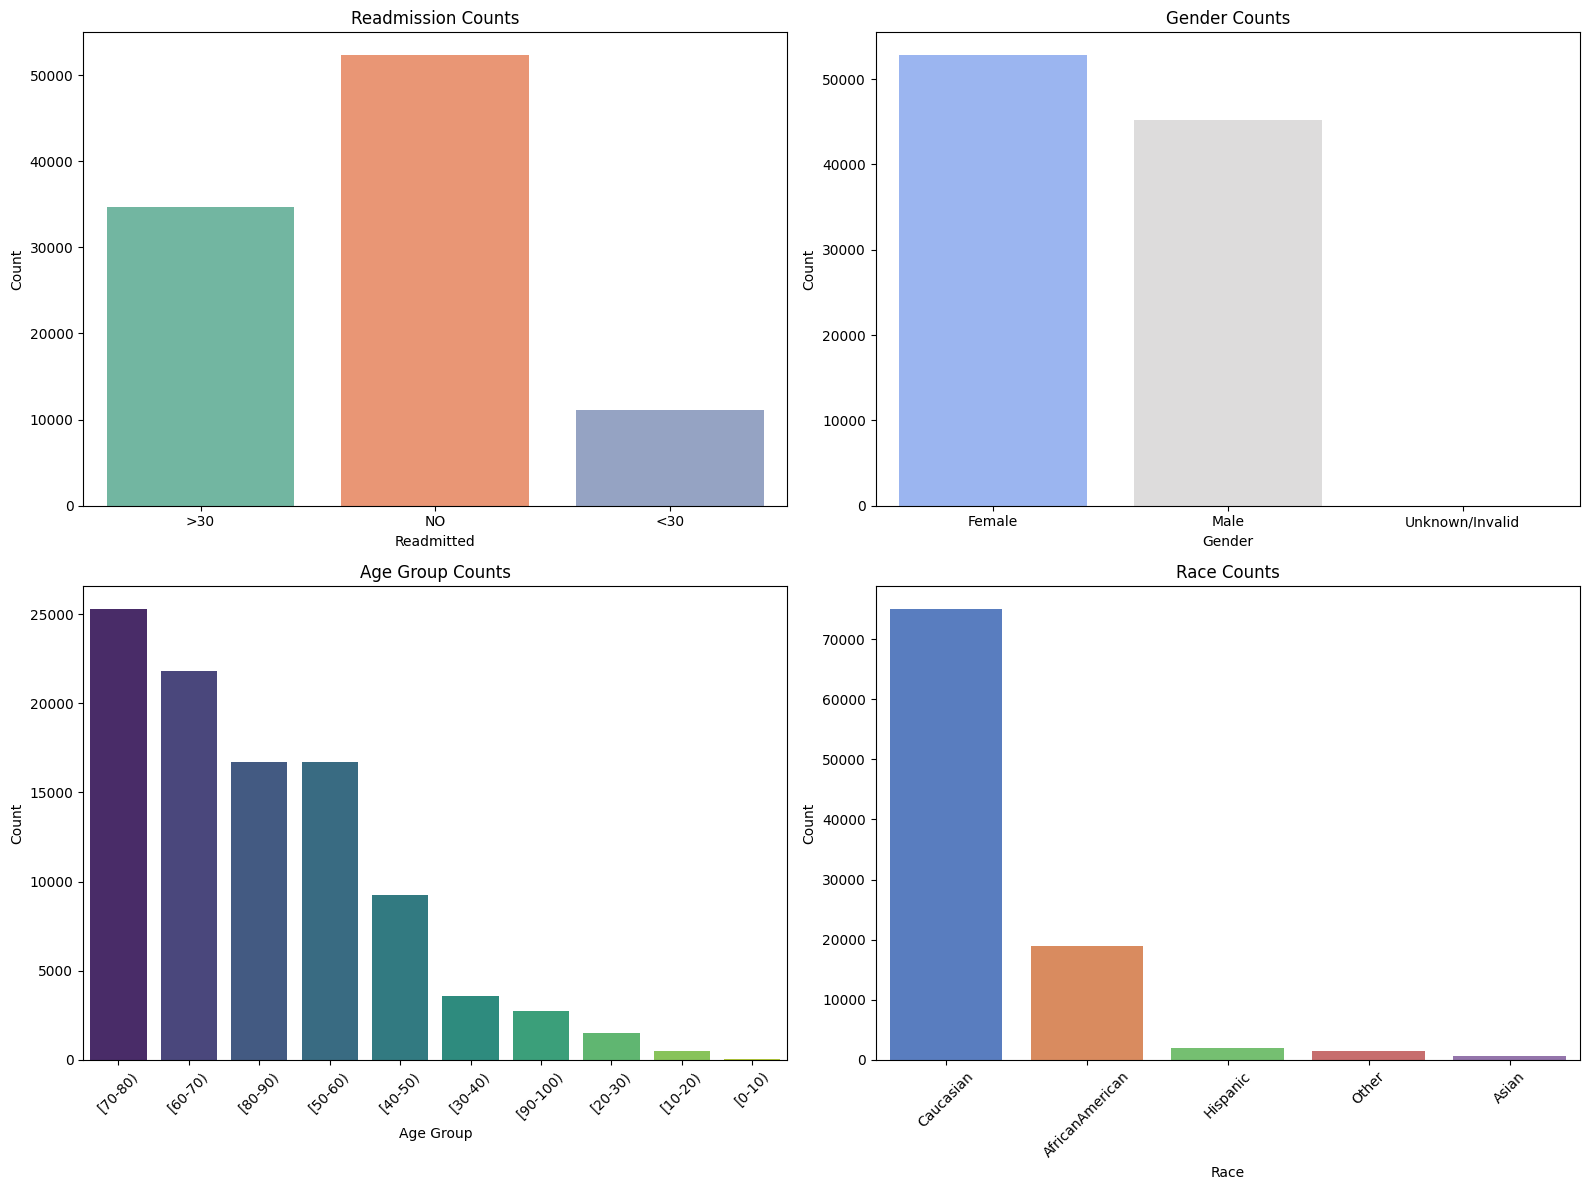

In [84]:
# Create a figure and axes (2x2 grid for 4 plots)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Readmission Counts
sns.countplot(ax=axes[0, 0], x='readmitted', data=df, palette='Set2')
axes[0, 0].set_title('Readmission Counts')
axes[0, 0].set_xlabel('Readmitted')
axes[0, 0].set_ylabel('Count')

# Plot 2: Gender Counts
sns.countplot(ax=axes[0, 1], x='gender', data=df, palette='coolwarm')
axes[0, 1].set_title('Gender Counts')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# Plot 3: Age Group Counts
sns.countplot(ax=axes[1, 0], x='age', data=df, palette='viridis', order=df['age'].value_counts().index)
axes[1, 0].set_title('Age Group Counts')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Race Counts
sns.countplot(ax=axes[1, 1], x='race', data=df, palette='muted', order=df['race'].value_counts().index)
axes[1, 1].set_title('Race Counts')
axes[1, 1].set_xlabel('Race')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust the layout so plots don't overlap
plt.tight_layout()

# Show the plots
plt.show()


## Time in Hospital vs. Readmission
Look at how the length of stay (time_in_hospital) correlates with the likelihood of readmission.

readmitted
<30    4.786192
>30    4.511645
NO     4.285605
Name: time_in_hospital, dtype: float64


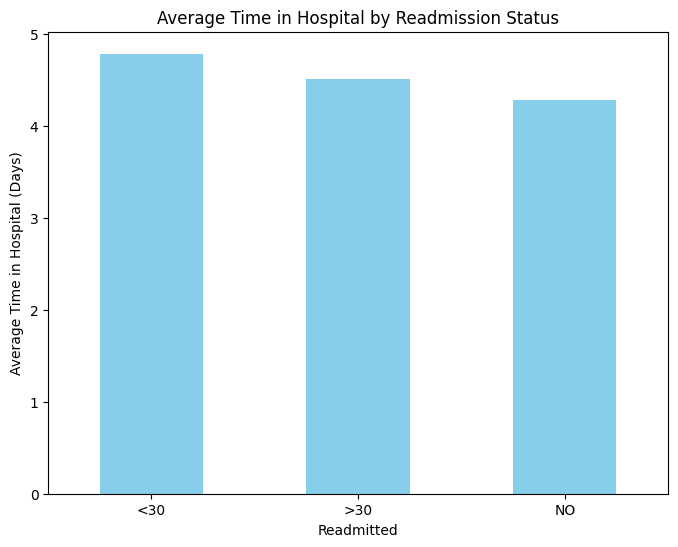

In [85]:
# Group by readmission and calculate the average time in hospital
time_in_hospital_mean = df.groupby('readmitted')['time_in_hospital'].mean()

# Print the calculated means
print(time_in_hospital_mean)

# Plotting the average time in hospital by readmission status
plt.figure(figsize=(8, 6))
time_in_hospital_mean.plot(kind='bar', color='skyblue')
plt.title('Average Time in Hospital by Readmission Status')
plt.xlabel('Readmitted')
plt.ylabel('Average Time in Hospital (Days)')
plt.xticks(rotation=0)
plt.show()

## Medication Changes and Readmission
Investigate how changes in medication (change) affect readmission rates.

readmitted       <30       >30        NO
change                                  
Ch          0.119526  0.370989  0.509486
No          0.107136  0.338254  0.554610


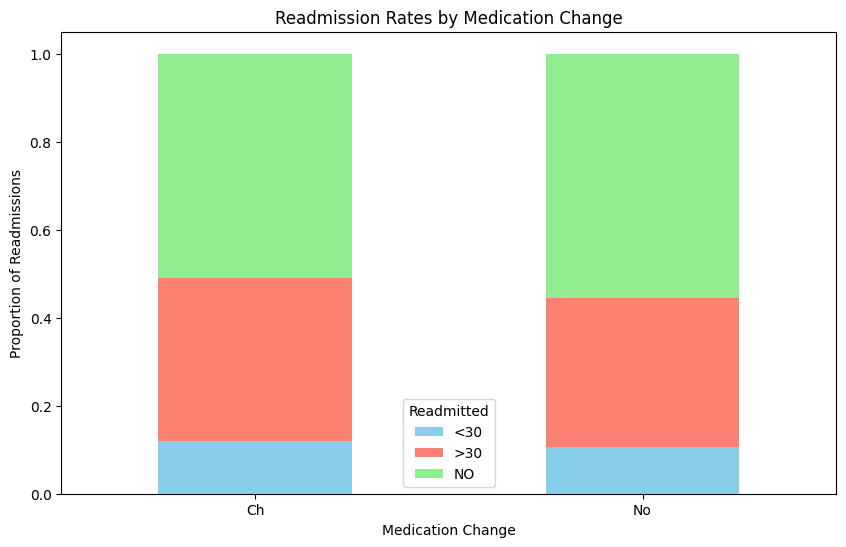

In [86]:

# Analyze readmission rates by medication change
medication_change_readmission = df.groupby('change')['readmitted'].value_counts(normalize=True).unstack()

# Print the results
print(medication_change_readmission)

# Plotting the results
medication_change_readmission.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Readmission Rates by Medication Change')
plt.xlabel('Medication Change')
plt.ylabel('Proportion of Readmissions')
plt.xticks(rotation=0)
plt.legend(title='Readmitted')
plt.show()


## Visualization of Readmission
Visualize the distribution of readmitted patients to see how often patients are being readmitted within 30 days or not.

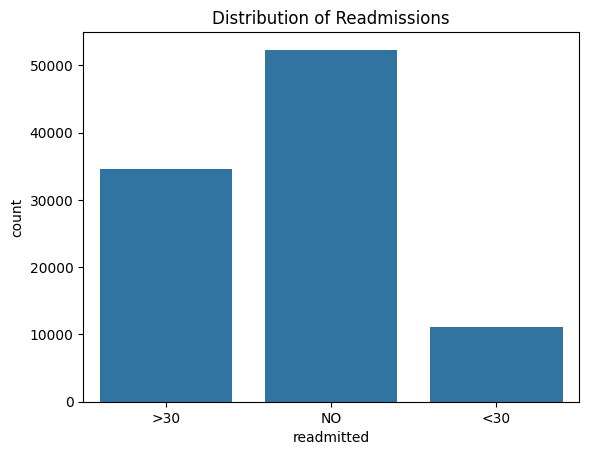

Distribution of Readmissions plotted above.


In [87]:
# Plot readmission counts
sns.countplot(x='readmitted', data=df)
plt.title('Distribution of Readmissions')
plt.show()

# Print a message describing the output
print("Distribution of Readmissions plotted above.")

## Correlation of Numeric Variables with Readmission
Check correlations between numerical features like num_lab_procedures, num_medications, and time_in_hospital to see if they relate to readmission.

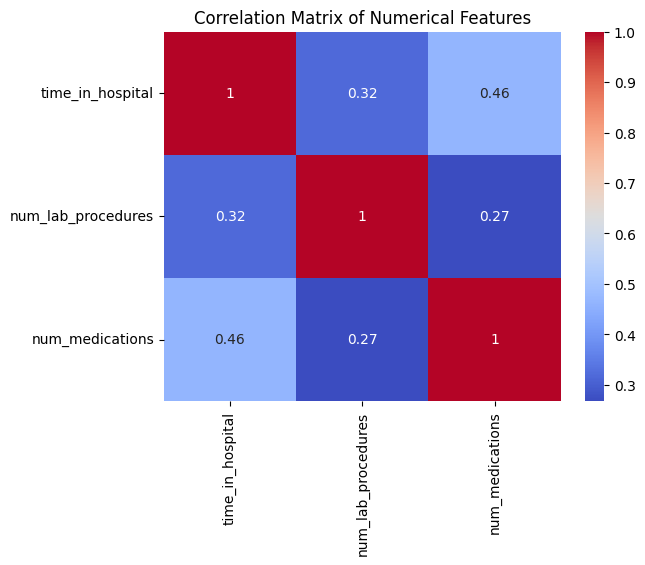

In [88]:
# Correlation matrix including time_in_hospital and other numerical columns
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_medications']
corr_matrix = df[numeric_features].corr()

# Plot heatmap of correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [89]:
df_gr = df.copy()

# grouping the medications according to their pharmacological properties
meds = ['metformin', 'repaglinide','nateglinide', 'chlorpropamide', 'glimepiride','acetohexamide', 'glipizide', 
                       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone','acarbose', 
                       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
                       'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
                       'metformin-rosiglitazone','metformin-pioglitazone']
for med in meds:
    df_gr[med] = df_gr[med].apply(lambda x: 0 if x == 'No' else 1)

df_gr['SU'] = df_gr[['chlorpropamide', 'glimepiride','acetohexamide', 'glipizide', 
                       'glyburide', 'tolbutamide', 'tolazamide']].max(axis=1)
df_gr[' meglitinides'] = df_gr[['repaglinide','nateglinide']].max(axis=1)
df_gr['thiazolidinediones'] = df_gr[['pioglitazone', 'rosiglitazone','troglitazone']].max(axis=1)
df_gr['glucosidase_inh'] = df_gr[['acarbose','miglitol']].max(axis=1)
df_gr.drop(axis=1,columns=['chlorpropamide', 'glimepiride','acetohexamide', 'glipizide', 
                       'glyburide', 'tolbutamide', 'tolazamide','repaglinide','nateglinide','pioglitazone', 'rosiglitazone',
                       'acarbose','miglitol','troglitazone'],inplace=True)
pharm_grp = ['SU',' meglitinides', 'thiazolidinediones', 'glucosidase_inh','metformin', 'insulin']
df_gr.head()

encounter_id  patient_nbr             race  gender      age  \
0        149190     55629189        Caucasian  Female  [10-20)   
1         64410     86047875  AfricanAmerican  Female  [20-30)   
2        500364     82442376        Caucasian    Male  [30-40)   
3         16680     42519267        Caucasian    Male  [40-50)   
4         35754     82637451        Caucasian    Male  [50-60)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  1                         1                    7   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  2                         1                    2   

   time_in_hospital  num_lab_procedures  ...  metformin-pioglitazone  change  \
0                 3                  59  ...                       0      Ch   
1                 2                  11  ...                       0      No   
2                 2                  44  ...                       0      Ch   
3                 1                  51  ...                       0      Ch   
4                 3                  31  ...                       0      No   

   diabetesMed  readmitted  max_glu_serum_transformed A1Cresult_transformed  \
0          Yes         >30               Not measured          Not measured   
1          Yes          NO               Not measured          Not measured   
2          Yes          NO               Not measured          Not measured   
3          Yes          NO               Not measured          Not measured   
4          Yes         >30               Not measured          Not measured   

  SU mitiglinides  thiazolidinediones  glucosidase_inh  
0  0            0                   0                0  
1  1            0                   0                0  
2  0            0                   0                0  
3  1            0                   0                0  
4  0            0                   0                0  

[5 rows x 37 columns]

In [101]:

import plotly.express as px
import pandas as pd

# Melt the DataFrame to reshape it for the box plot
df_melted = pd.melt(df_gr, id_vars=['time_in_hospital'], 
                    value_vars=pharm_grp, 
                    var_name='Pharmacological Group', 
                    value_name='Medication Use')

# Filter rows where Medication Use is 1 (i.e., the medication was used)
df_filtered = df_melted[df_melted['Medication Use'] == 1]

# Create the box plot
fig = px.box(df_filtered,  # Use the filtered DataFrame
             x='Pharmacological Group', 
             y='time_in_hospital', 
             title='Time in Hospital by Pharmacological Group',
             labels={'time_in_hospital': 'Time in Hospital (Days)', 
                     'Pharmacological Group': 'Main Antidiabetic Medications'})  # Show all points as well

# Show the plot
fig.show()

time_in_hospital Pharmacological Group  Medication Use
1                      2                    SU               1
3                      1                    SU               1
5                      4                    SU               1
6                      5                    SU               1
7                     13                    SU               1
...                  ...                   ...             ...
588312                 6               insulin               1
588313                 3               insulin               1
588314                 5               insulin               1
588315                 1               insulin               1
588316                10               insulin               1

[114421 rows x 3 columns]

In [111]:
# Define a mapping for age categories to numerical values
age_mapping = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25, 
    '[30-40)': 35, 
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}

# Map the age categories to their corresponding numeric values
df_gr['age_numeric'] = df_gr['age'].map(age_mapping)


# Melt the DataFrame
df_melted2 = pd.melt(df_gr, id_vars=['age', 'readmitted','age_numeric'], 
                    value_vars=pharm_grp, 
                    var_name='Pharmacological Group', 
                    value_name='Medication Use')

# Filter rows where Medication Use is 1 (i.e., the medication was used)
df_filtered2 = df_melted2[df_melted2['Medication Use'] == 1].copy()  # Make a copy to avoid SettingWithCopyWarning

# Set readmitted as a categorical variable using .loc
df_filtered2['readmitted_binary'] = df_filtered2['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

# Define the correct order for the age categories
age_order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']



# Create the violin plot with ordered categories and increased width
fig = px.violin(df_filtered2, 
                 x='Pharmacological Group', 
                 y='age_numeric', 
                 color='readmitted_binary', 
                 title='Distribution of Age by Pharmacological Group',
                 category_orders={'age': age_order},  # Order age categories
                 color_discrete_sequence=px.colors.qualitative.Set1,
                 ) 

# Adjust the violins' thickness
fig.update_traces(width=0.9)  # Adjust thickness of the violins
# Update legend labels
fig.for_each_trace(lambda trace: trace.update(name='Readmitted' if trace.name == '1' else 'Not Readmitted'))
# Show the plot
fig.show()


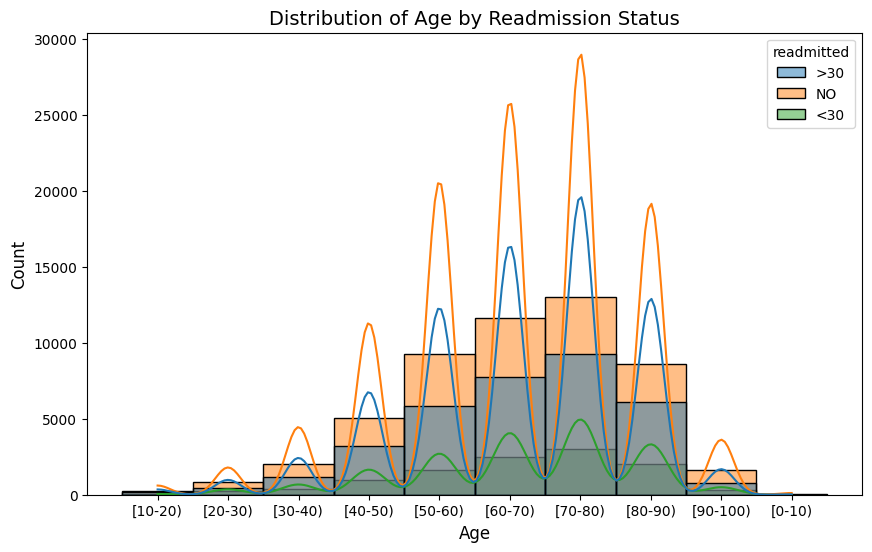

In [96]:
plt.ion() 
# Plot the distribution of age by outcome
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='readmitted', bins=20, kde=True)
plt.title('Distribution of Age by Readmission Status', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()